# Lorenz Chaos Equations  
The Lorenz equations are a set of differential equations in three dimensional space that explain chaotic convergence on two points in that space. However, they can be used for a range of applications.

### Nonlinear Equations   
The coupled nonlinear equations for the relationship are given as:  

$ \frac{dx}{dt} = \sigma\big( y - x \big)  $
<br>

$ \frac{dy}{dt} = x \big( \rho - z \big) - y $
<br>

$ \frac{dz}{dt} = xy - \beta z$
<br>

In [1]:
#import numerical, graphics, and interactive packages
import numpy as np #numerical processing
import matplotlib.pyplot as plt #plot package
from matplotlib import animation
import mpl_toolkits.mplot3d #3D plotting help
import seaborn as sns #makes plots look nice
from ipywidgets import (IntSlider, FloatSlider, FloatText, jslink) #the widgets which will be used for parameter input
from IPython.display import (display, HTML)
from scipy.integrate import odeint
import sympy #symbolic python, to calculate diffEQ solutions

#magic function to plot in Jupyter
%matplotlib inline

#make symbolic python output in LaTeX
sympy.init_printing(use_unicode=True)

In [2]:
#create symbolic variables
x, y, z = sympy.symbols('x y z')
sigma, rho, beta = sympy.symbols('sigma rho beta')

#create symbolic diffEQs
dx_dt = sigma * (y - x)
dy_dt = x * (rho - z) - y
dz_dt = x * y - beta * z

#display equations
dx_dt, dy_dt, dz_dt

In [7]:
#create steady state equations
ss_eqns = [sympy.Eq(dx_dt, 0),sympy.Eq(dy_dt,0),sympy.Eq(dz_dt, 0)]
#ss_dy = sympy.Eq(dy_dt, 0)
#ss_dz = sympy.Eq(dz_dt, 0)

ss_eqns

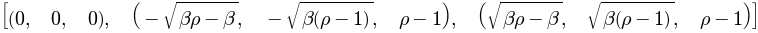

In [8]:
#solve the system simultaneously for steady states
ss_dict = sympy.solve(ss_eqns, [x,y,z])

ss_dict

In [27]:
#create functions for numerical evaluation
dx_dt_num = sympy.utilities.lambdify([x, y, sigma], dx_dt)
dy_dt_num = sympy.utilities.lambdify([x, y, z, rho], dy_dt)
dz_dt_num = sympy.utilities.lambdify([x, y, z, beta], dz_dt)

def lorenz_rhs(terms, t):
    x_in, y_in, z_in = terms
    
    #numerical derivatives
    dx_dot=dx_dt_num(x_in, y_in, sigma_in)
    dy_dot=dy_dt_num(x_in, y_in, z_in, rho_in)
    dz_dot=dz_dt_num(x_in, y_in, z_in, beta_in)

    return np.array([dx_dot, dy_dot, dz_dot])


In [36]:
u = IntSlider(description = '$\sigma$')
u2= FloatText()
u.value = 10
jslink((u, 'value'), (u2, 'value'))
display(u,u2)

v = FloatSlider(description = '$\rho$')
v2= FloatText()
v.value = 8/3
jslink((v, 'value'), (v2, 'value'))
display(v,v2)

w = IntSlider(description = '$\beta$')
w2 = FloatText()
w.value = 28
jslink((w, 'value'), (w2, 'value'))
display(w,w2)

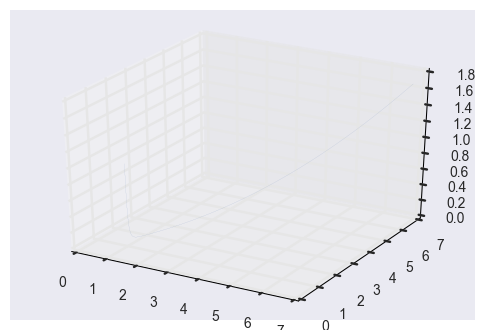

In [38]:
#define parameters
sigma_in = u.value
rho_in = v.value
beta_in = w.value

#initial condition
xyz_0 = [1, 1, 1]

#timestep
dt = 0.01
tf = 1000
t = np.linspace(0, tf, tf/dt+1)

x_y_z = odeint(lorenz_rhs, xyz_0, t)

#plot
#sns.set_style({"axes.linewidth":"0.01"})
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.set_xlim(-30,30)
#ax.set_ylim(-30,30)
#ax.set_zlim(0,50)

#objects that will change
txt_title = ax.set_title('')
line = ax.plot([], [], [], 'b', lw=1)[0]
pt = ax.plot([], [], [], 'g.', ms=7)[0]
#ax.axis('off')

#create frames
def drawframe(n):
    pt.set_data(x_y_z[n,0], x_y_z[n,1])
    pt.set_3d_properties(x_y_z[n,2])
    line.set_data(x_y_z[:n,0], x_y_z[:n,1])
    line.set_3d_properties(x_y_z[:n,2])
    txt_title.set_text('Frame = {0:4d}'.format(n))
    return (line, pt)

#anim = animation.FuncAnimation(fig, drawframe, frames=len(t), interval=20, blit=True)
#HTML(anim.to_html5_video())
        
ax.plot(x_y_z[:,0], x_y_z[:,1], x_y_z[:,2], linewidth=0.05)